<font size="5">you can find datasets in kaggle , check readme for datasets links . Also you can see these notebook from my kaggle page , you can find link in readme  file
 .</font>

In [1]:
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

/kaggle/input/videogamesales/vgsales.csv


<font size="4">Welcome to my notebook , in this notebook you are gonna find so many plots, different plot techniques , different strategies .</font><br>
<font size="5">in this notebook PLOTLY is generally used</font>

* Bar
* Graph
* Profile Report
* Graph with Multiple Lines
* Heat Map
* Correlation Matrix
* Scatter
* ANİMATED Bar
* Bar with multiple values



# Import necessary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import plotly.express as px

%matplotlib inline

# Exploring Dataset

In [18]:
df=pd.read_csv("datasets/vgsales.csv")
df.head(5)

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

**I am gonna use 'ydata_profiling' for report**

In [4]:
# lets explore dataset
from ydata_profiling import ProfileReport
profile = ProfileReport(df)

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [5]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Check Data Types , Duplicates , Missing Values

In [19]:
df.dtypes # everything seems okey 

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [20]:
df.columns # all columns seems useful 

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [21]:
df.isnull().sum() # chech missing values , they are not that much we can drop them

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [22]:
df.dropna(axis=0,inplace=True) # we dont have null value now

In [23]:
df.isnull().sum() # we dont have null value now

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

***Dataset seems very clear , we can start plotting***

# PLOTTİNG

In [29]:
df.head(3)

Rank               Name Platform    Year     Genre Publisher  NA_Sales  \
0     1         Wii Sports      Wii  2006.0    Sports  Nintendo     41.49   
1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo     29.08   
2     3     Mario Kart Wii      Wii  2008.0    Racing  Nintendo     15.85   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82

<font size="5"> Released Game Number  Yearly</font>

In [27]:
yearly_game=pd.DataFrame(df["Year"].value_counts()).reset_index()
yearly_game=yearly_game.sort_values("Year",ascending=True)
yearly_game[:5]

Year  count
36  1980.0      9
24  1981.0     46
27  1982.0     36
30  1983.0     17
35  1984.0     14

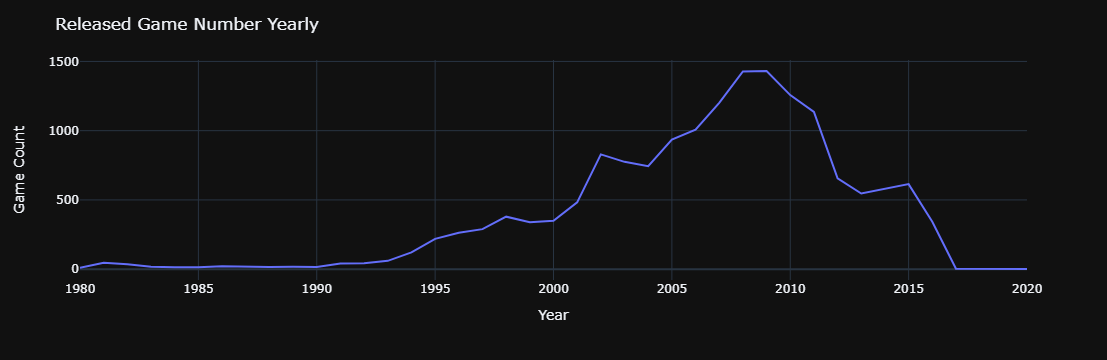

In [28]:
fig=px.line(yearly_game,x="Year",y="count")

fig.update_layout(
    template="plotly_dark",
    title_text='Released Game Number Yearly', 
    yaxis_title="Game Count",  
    width=1000
        )

<font size="5">Yearly Global Sales</font>

In [30]:
yearly_sales=pd.DataFrame(df.groupby(["Year"])["Global_Sales"].sum()).reset_index()
yearly_sales[:5]

Year  Global_Sales
0  1980.0         11.38
1  1981.0         35.77
2  1982.0         28.86
3  1983.0         16.79
4  1984.0         50.36

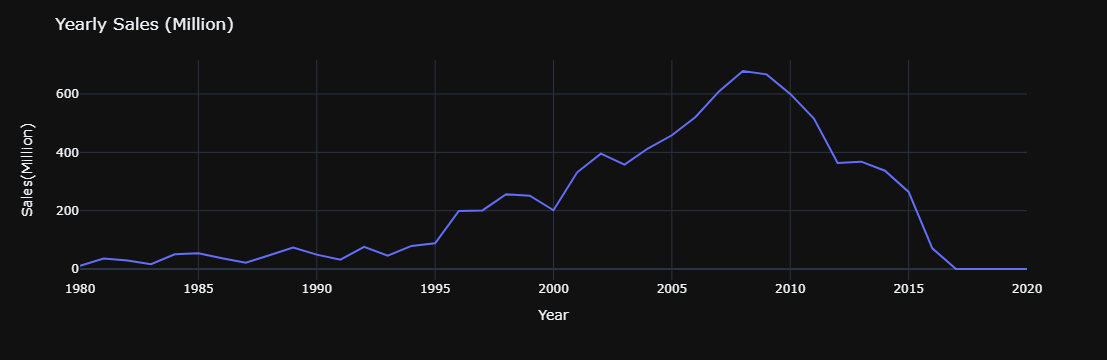

In [31]:
fig=px.line(yearly_sales,x="Year",y="Global_Sales")

fig.update_layout(
    template="plotly_dark",
    title_text='Yearly Sales (Million)',   
    yaxis_title="Sales(Million)",   
    width=1000
                )

<font size="5">Yearly Continent Sales </font>

In [32]:
continent_sales_yearly=(df.groupby(["Year"])[["NA_Sales","EU_Sales","Other_Sales","JP_Sales"]].sum().reset_index())
continent_sales_yearly[:5]

Year  NA_Sales  EU_Sales  Other_Sales  JP_Sales
0  1980.0     10.59      0.67         0.12      0.00
1  1981.0     33.40      1.96         0.32      0.00
2  1982.0     26.92      1.65         0.31      0.00
3  1983.0      7.76      0.80         0.14      8.10
4  1984.0     33.28      2.10         0.70     14.27

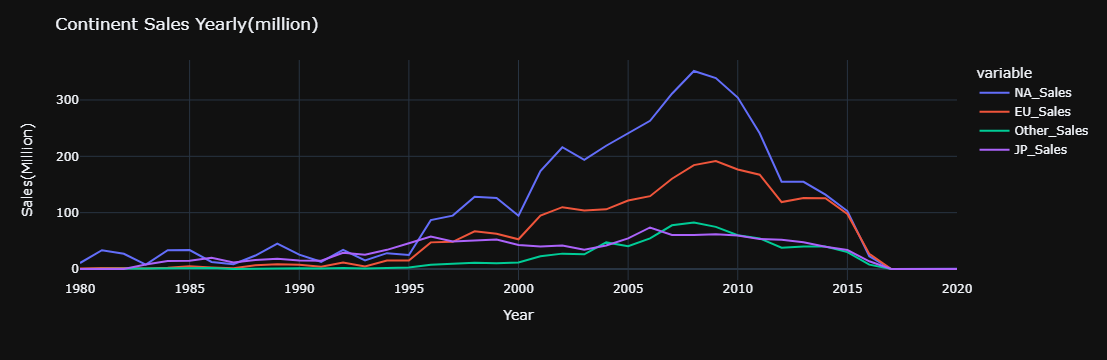

In [33]:
fig = px.line(continent_sales_yearly, x='Year', y=continent_sales_yearly.columns[1:5])

fig.update_layout(
    template="plotly_dark",
    title_text='Continent Sales Yearly(million)',  # Set the title of the plot
    yaxis_title="Sales(Million)",  # Label for the y-axis
    width=1000
                )

<font size="5">Yearly Sales by Genre</font>

In [34]:
df.groupby(["Genre","Year"])["Global_Sales"].sum()

Genre     Year  
Action    1980.0     0.34
          1981.0    14.84
          1982.0     6.52
          1983.0     2.86
          1984.0     1.85
                    ...  
Strategy  2012.0     3.33
          2013.0     6.33
          2014.0     0.99
          2015.0     1.82
          2016.0     0.50
Name: Global_Sales, Length: 389, dtype: float64

In [35]:
genre_yearly=pd.DataFrame(df.groupby(["Genre","Year"])["Global_Sales"].sum())
genre_yearly

Global_Sales
Genre    Year                
Action   1980.0          0.34
         1981.0         14.84
         1982.0          6.52
         1983.0          2.86
         1984.0          1.85
...                       ...
Strategy 2012.0          3.33
         2013.0          6.33
         2014.0          0.99
         2015.0          1.82
         2016.0          0.50

[389 rows x 1 columns]

In [36]:
genre_list=[] 
for genre in genre_yearly.index:
    if genre[0] not in genre_list:
        genre_list.append(genre[0])
genre_list

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [37]:
plt.rcParams["figure.figsize"] = (12,6)

Text(0, 0.5, 'Sales(million)')

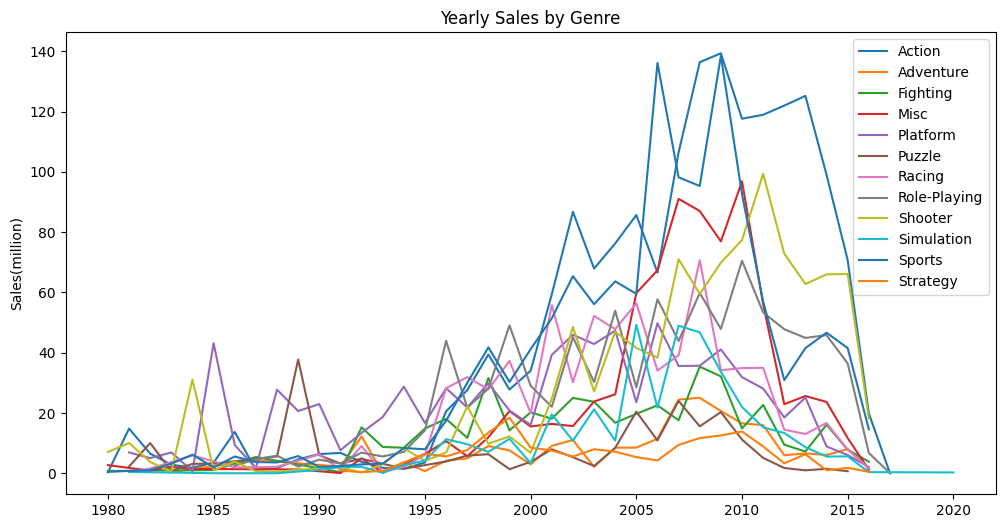

In [38]:
for genre in genre_list:
    row=genre_yearly.loc[genre].reset_index()
    plt.plot(row["Year"],row["Global_Sales"])

plt.legend(genre_list)
plt.title("Yearly Sales by Genre")
plt.ylabel("Sales(million)")

<font size="5">Released Game Numbers by Publishers</font>

In [39]:
publisher_game_count=df["Publisher"].value_counts()[:20]
publisher_game_count[:5]

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: count, dtype: int64

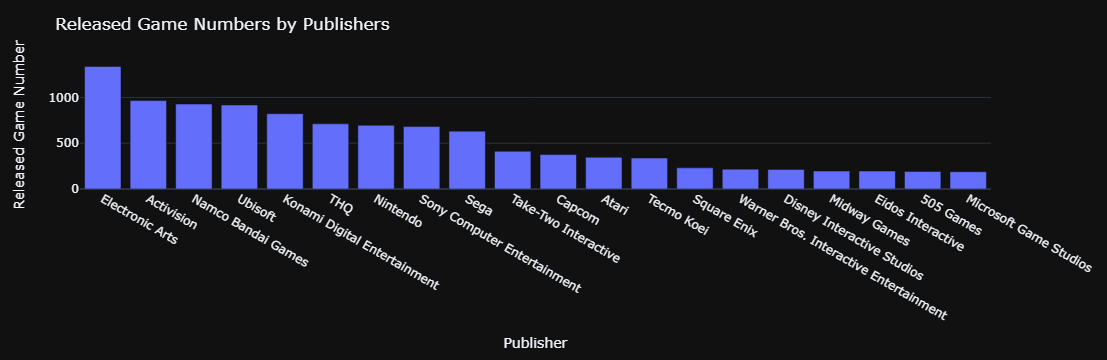

In [40]:
fig=px.bar(x=publisher_game_count.index,y=publisher_game_count)

fig.update_layout(
    template="plotly_dark",
    title_text='Released Game Numbers by Publishers',  # Set the title of the plot
    yaxis_title="Released Game Number",  # Label for the y-axis
    xaxis_title="Publisher",
    width=1000
                )

<font size="5">Global Sales by Genre</font>

In [41]:
global_sales_genre=df.groupby(["Genre"])["Global_Sales"].sum()
global_sales_genre

Genre
Action          1722.84
Adventure        234.59
Fighting         444.05
Misc             789.87
Platform         829.13
Puzzle           242.21
Racing           726.76
Role-Playing     923.83
Shooter         1026.20
Simulation       389.98
Sports          1309.24
Strategy         173.27
Name: Global_Sales, dtype: float64

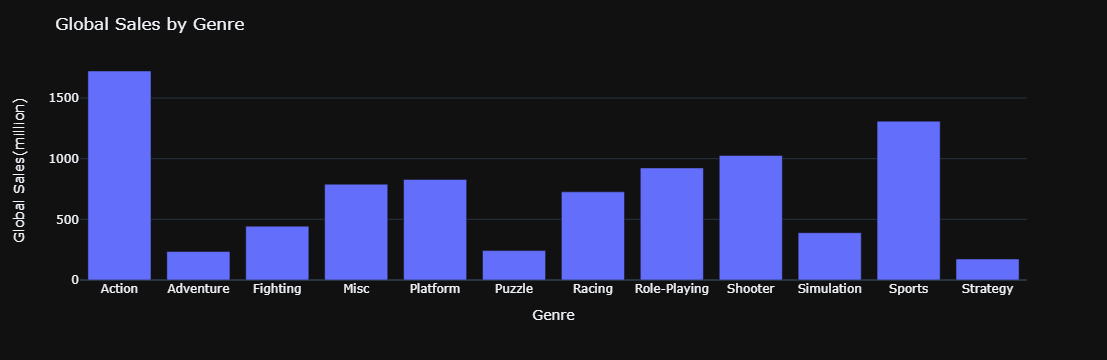

In [42]:
fig=px.bar(x=global_sales_genre.index,y=global_sales_genre)

fig.update_layout(
    template="plotly_dark",
    title_text='Global Sales by Genre',  # Set the title of the plot
    yaxis_title="Global Sales(million)",  # Label for the y-axis
    xaxis_title="Genre",
    width=1000
                )

<font size="5">Released Game Number by Genre</font>

In [43]:
genre_count=df["Genre"].value_counts()
genre_count[:4]

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Name: count, dtype: int64

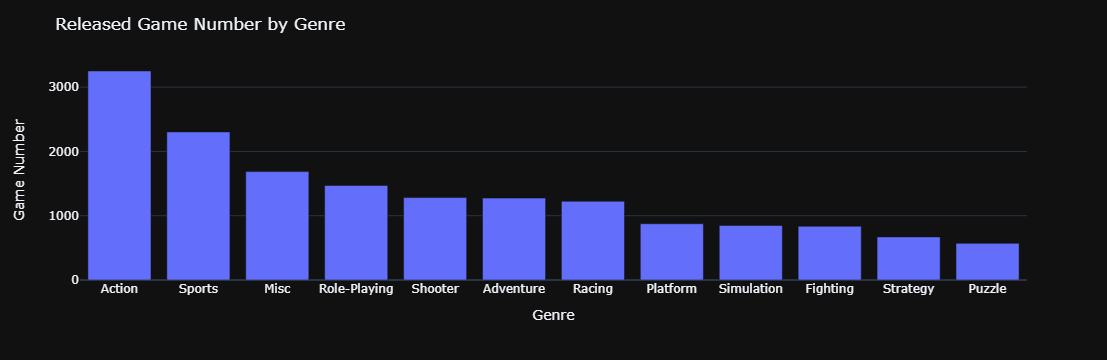

In [44]:
fig=px.bar(x=genre_count.index,y=genre_count)

fig.update_layout(
    template="plotly_dark",
    title_text='Released Game Number by Genre',  # Set the title of the plot
    yaxis_title="Game Number",  # Label for the y-axis
    xaxis_title="Genre",
    width=1000
                )

<font size="5">Sale Numbers by Publishers</font>

In [45]:
publisher_sales=df.groupby(["Publisher"])["Global_Sales"].sum()
publisher_sales=publisher_sales.sort_values(ascending=False)[:20]
publisher_sales

Publisher
Nintendo                                  1784.43
Electronic Arts                           1093.39
Activision                                 721.41
Sony Computer Entertainment                607.28
Ubisoft                                    473.54
Take-Two Interactive                       399.30
THQ                                        340.44
Konami Digital Entertainment               278.56
Sega                                       270.70
Namco Bandai Games                         253.65
Microsoft Game Studios                     245.79
Capcom                                     199.95
Atari                                      146.77
Square Enix                                144.73
Warner Bros. Interactive Entertainment     142.34
Disney Interactive Studios                 118.76
Eidos Interactive                           96.75
LucasArts                                   84.95
Bethesda Softworks                          81.53
Midway Games                            

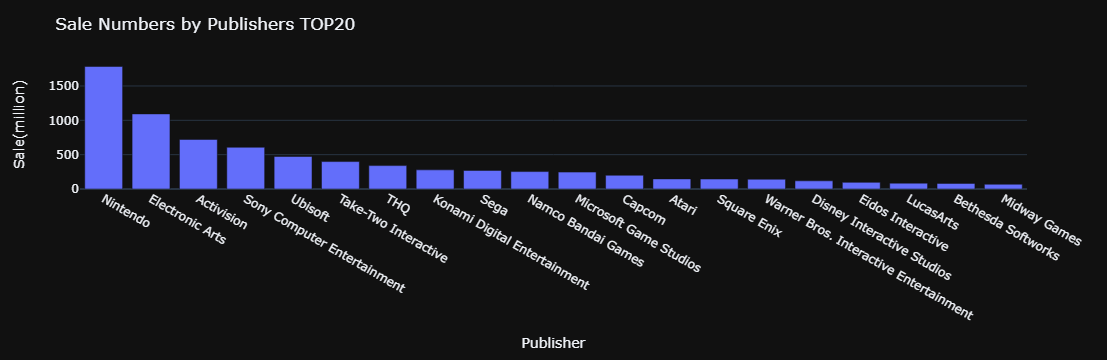

In [46]:
fig=px.bar(x=publisher_sales.index,y=publisher_sales)

fig.update_layout(
    template="plotly_dark",
    title_text='Sale Numbers by Publishers TOP20',  # Set the title of the plot
    yaxis_title="Sale(million)",  # Label for the y-axis
    xaxis_title="Publisher",
    width=1200
                )

<font size="5">Released Game Numbers by Platforms </font>

In [47]:
platform_game_count=df["Platform"].value_counts()[:20]
platform_game_count[:5]

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
Name: count, dtype: int64

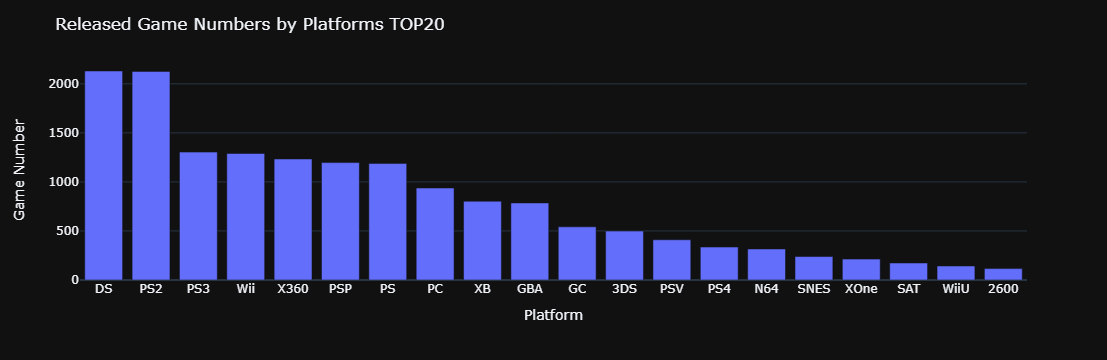

In [48]:
fig=px.bar(x=platform_game_count.index,y=platform_game_count)

fig.update_layout(
    template="plotly_dark",
    title_text='Released Game Numbers by Platforms TOP20',  # Set the title of the plot
    yaxis_title="Game Number",  # Label for the y-axis
    xaxis_title="Platform",
    width=1000
                )

<font size="5">Compare Sale Numbers by Genre in HEATMAP</font>

In [49]:
genre_df = df[["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]

genre_map = genre_df.groupby(["Genre"]).sum()
genre_map

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          861.77    516.48    158.65       184.92
Adventure       101.93     63.74     51.99        16.70
Fighting        220.74    100.00     87.15        36.19
Misc            396.92    211.77    106.67        73.92
Platform        445.99    200.65    130.65        51.51
Puzzle          122.01     50.52     56.68        12.47
Racing          356.93    236.31     56.61        76.68
Role-Playing    326.50    187.57    350.29        59.38
Shooter         575.16    310.45     38.18       101.90
Simulation      181.78    113.02     63.54        31.36
Sports          670.09    371.34    134.76       132.65
Strategy         67.83     44.84     49.10        11.23

<Axes: ylabel='Genre'>

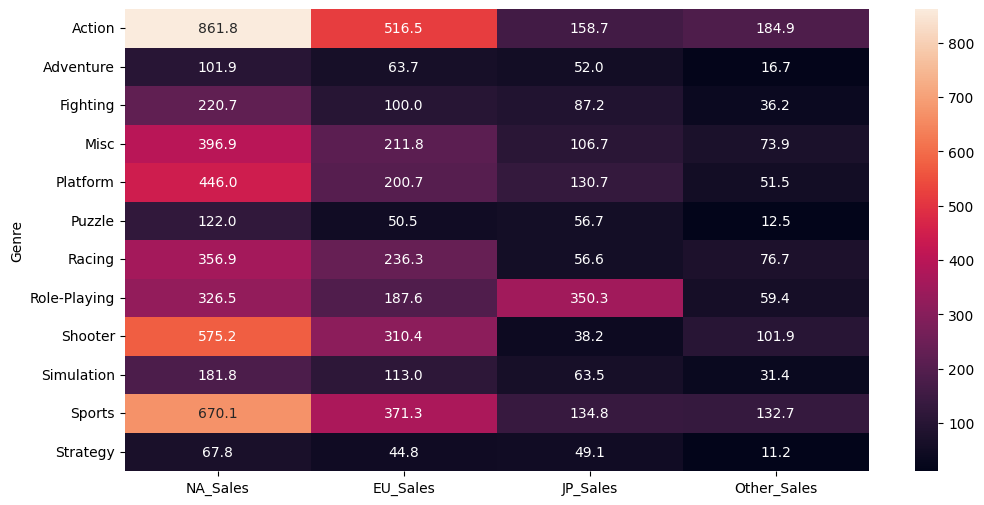

In [50]:
sns.heatmap(genre_map, annot=True, fmt = '.1f')

<font size="5">Sale Number in Continents by Genre</font>

In [51]:
cont_df=df[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
cont_df=cont_df.groupby(["Genre"])[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
cont_df

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          861.77    516.48    158.65       184.92
Adventure       101.93     63.74     51.99        16.70
Fighting        220.74    100.00     87.15        36.19
Misc            396.92    211.77    106.67        73.92
Platform        445.99    200.65    130.65        51.51
Puzzle          122.01     50.52     56.68        12.47
Racing          356.93    236.31     56.61        76.68
Role-Playing    326.50    187.57    350.29        59.38
Shooter         575.16    310.45     38.18       101.90
Simulation      181.78    113.02     63.54        31.36
Sports          670.09    371.34    134.76       132.65
Strategy         67.83     44.84     49.10        11.23

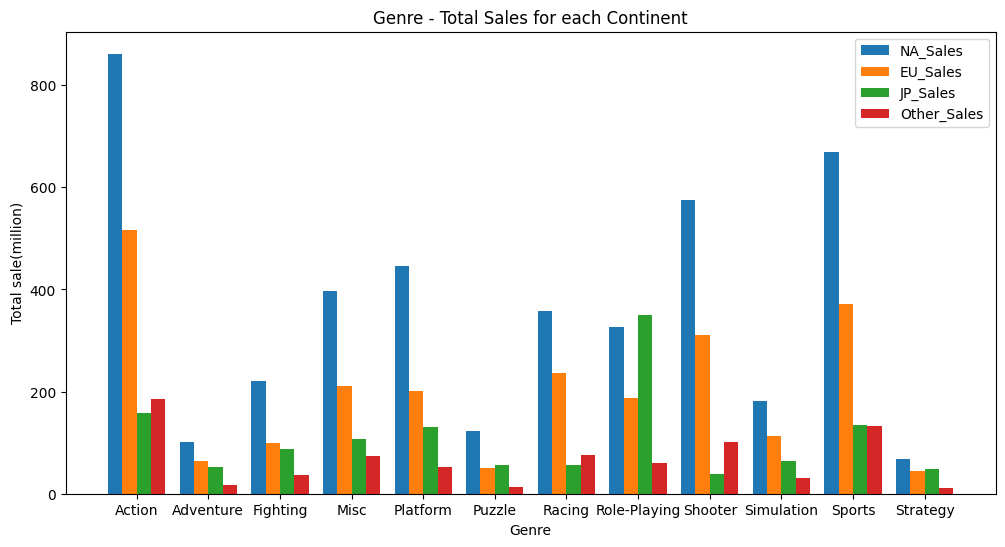

In [52]:
x=cont_df
X_axis = np.arange(len(x))

y1=cont_df["NA_Sales"]
y2=cont_df["EU_Sales"]
y3=cont_df["JP_Sales"]
y4=cont_df["Other_Sales"]
  
plt.bar(X_axis-0.3,y1,0.2,label="NA_Sales")
plt.bar(X_axis-0.1,y2,0.2,label="EU_Sales")
plt.bar(X_axis+0.1,y3,0.2,label="JP_Sales")
plt.bar(X_axis+0.3,y4,0.2,label="Other_Sales")

plt.xticks(X_axis, cont_df.index) 

plt.title("Genre - Total Sales for each Continent")
plt.xlabel("Genre")
plt.ylabel("Total sale(million)")

plt.legend()

<font size="5">Sale Number in Continents by Platform</font>

In [53]:
platform_sales=df[["Platform","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
platform_sales=platform_sales.groupby(["Platform"])[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum()
platform_sales=platform_sales.sort_values("Global_Sales",ascending=False)
platform_sales=platform_sales[:12]
platform_sales

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
PS2         572.92    332.63    137.54       190.47       1233.46
X360        594.33    278.00     12.30        84.67        969.60
PS3         388.90    340.47     79.21       140.81        949.35
Wii         497.37    264.35     68.28        79.20        909.81
DS          388.53    194.05    175.02        60.29        818.91
PS          334.71    212.38    139.78        40.69        727.39
GBA         178.43     72.49     46.56         7.51        305.62
PSP         107.09     67.16     75.89        41.52        291.71
PS4          96.80    123.70     14.30        43.36        278.10
PC           92.04    137.35      0.17        24.33        254.70
GB          113.64     47.51     85.12         8.16        254.42
XB          182.06     59.65      1.38         8.48        252.09

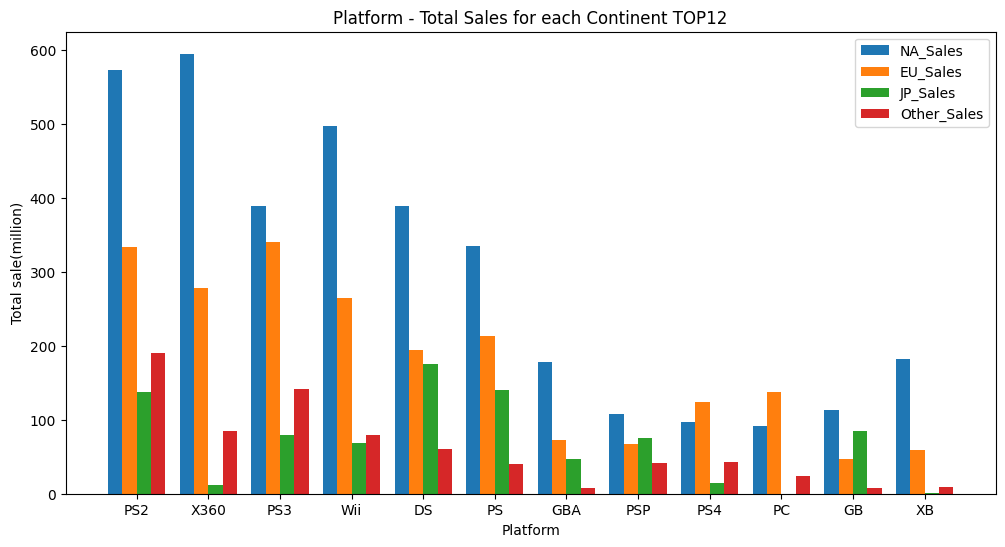

In [54]:
x=platform_sales
X_axis = np.arange(len(platform_sales))

y1=platform_sales["NA_Sales"]
y2=platform_sales["EU_Sales"]
y3=platform_sales["JP_Sales"]
y4=platform_sales["Other_Sales"]
  
plt.bar(X_axis-0.3,y1,0.2,label="NA_Sales")
plt.bar(X_axis-0.1,y2,0.2,label="EU_Sales")
plt.bar(X_axis+0.1,y3,0.2,label="JP_Sales")
plt.bar(X_axis+0.3,y4,0.2,label="Other_Sales")

plt.xticks(X_axis, platform_sales.index) # IMPORTANTE

plt.title("Platform - Total Sales for each Continent TOP12")
plt.xlabel("Platform")
plt.ylabel("Total sale(million)")

plt.legend()

<font size="5">Sale Number in Continents by Publisher</font>

In [55]:
publisher_cont=df[["Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
publisher_cont=publisher_cont.groupby(["Publisher"])[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum()
publisher_cont=publisher_cont.sort_values("Global_Sales",ascending=False)
publisher_cont=publisher_cont[:10]
publisher_cont[:5]

NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Publisher                                                                
Nintendo                       815.75    418.30    454.99        95.19   
Electronic Arts                584.22    367.38     13.98       127.63   
Activision                     426.01    213.72      6.54        74.79   
Sony Computer Entertainment    265.22    187.55     74.10        80.40   
Ubisoft                        252.81    163.03      7.33        50.16   

                             Global_Sales  
Publisher                                  
Nintendo                          1784.43  
Electronic Arts                   1093.39  
Activision                         721.41  
Sony Computer Entertainment        607.28  
Ubisoft                            473.54

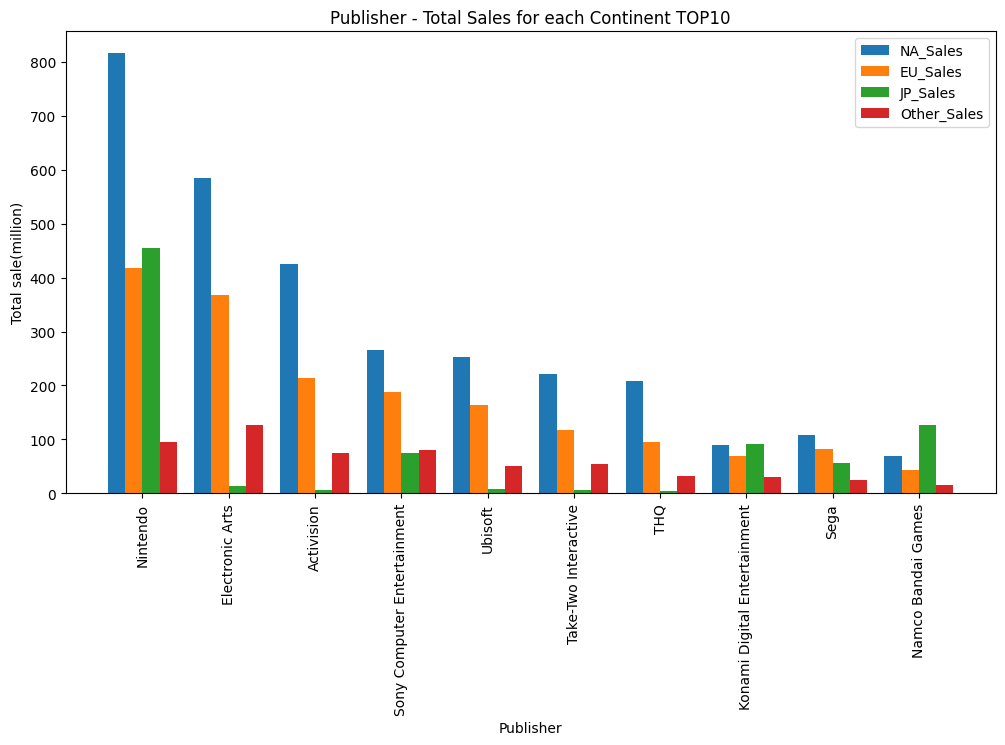

In [56]:
x=publisher_cont
X_axis = np.arange(len(publisher_cont))

y1=publisher_cont["NA_Sales"]
y2=publisher_cont["EU_Sales"]
y3=publisher_cont["JP_Sales"]
y4=publisher_cont["Other_Sales"]
  
plt.bar(X_axis-0.3,y1,0.2,label="NA_Sales")
plt.bar(X_axis-0.1,y2,0.2,label="EU_Sales")
plt.bar(X_axis+0.1,y3,0.2,label="JP_Sales")
plt.bar(X_axis+0.3,y4,0.2,label="Other_Sales")

plt.xticks(X_axis, publisher_cont.index,rotation=90) # IMPORTANTE

plt.title("Publisher - Total Sales for each Continent TOP10")
plt.xlabel("Publisher")
plt.ylabel("Total sale(million)")


plt.legend()

<font size="5">Maximum Game Released Number by Publisher Yearly</font>

In [57]:
df["count"]=1

In [58]:
publisher_count=df[["Year","Publisher","count"]]
publisher_count=pd.DataFrame(publisher_count.groupby(["Year","Publisher"])["count"].sum()).reset_index()
publisher_count_df=publisher_count.groupby(["Year"])["count"].max().reset_index()
publisher_count_df[:3]

Year  count
0  1980.0      5
1  1981.0     11
2  1982.0     14

In [59]:
publisher_count[:3] # i will use this df later when finding publisher name

Year                     Publisher  count
0  1980.0                    Activision      5
1  1980.0                         Atari      4
2  1981.0  20th Century Fox Video Games      3

In [60]:
klist=df["Year"].tolist()
year_list=list(dict.fromkeys(klist)) # drop duplicate
year_list.sort() # sort years
year_list[:3] # year list

[1980.0, 1981.0, 1982.0]

In [61]:
publisher_list=list()
count_list=list()

for row in publisher_count_df.values:
    smalldf=(publisher_count[(publisher_count["count"]==row[1]) & (publisher_count["Year"]==row[0])])
    count_list.append(smalldf["count"].values[0])
    publisher_list.append(smalldf["Publisher"].values[0])

Text(0.0, 1.0, 'TOP Publisher by Released Game Number Yearly')

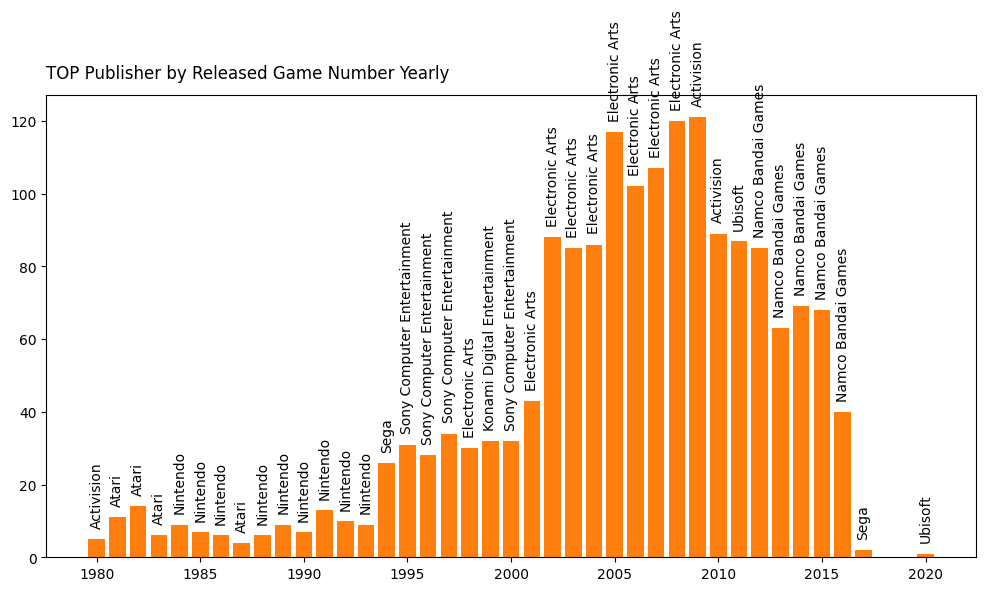

In [62]:
bar1=plt.bar(year_list,count_list)

plt.bar(year_list,count_list)
# Add counts above the two bar graphs

m=0
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height+3,
             f'{publisher_list[m]}', ha='center', va='bottom', rotation=90)
    m+=1
plt.title("TOP Publisher by Released Game Number Yearly",loc="left",pad=12)

<font size="5">TOP10 game sales continent</font>

In [63]:
top10_game=df[["Name","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
top10_game=top10_game[:10]
 
top10_game=top10_game.set_index('Name') # Name columm is index now , we need this in heatmap
top10_game

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Name                                                                
Wii Sports                    41.49     29.02      3.77         8.46
Super Mario Bros.             29.08      3.58      6.81         0.77
Mario Kart Wii                15.85     12.88      3.79         3.31
Wii Sports Resort             15.75     11.01      3.28         2.96
Pokemon Red/Pokemon Blue      11.27      8.89     10.22         1.00
Tetris                        23.20      2.26      4.22         0.58
New Super Mario Bros.         11.38      9.23      6.50         2.90
Wii Play                      14.03      9.20      2.93         2.85
New Super Mario Bros. Wii     14.59      7.06      4.70         2.26
Duck Hunt                     26.93      0.63      0.28         0.47

<Axes: ylabel='Name'>

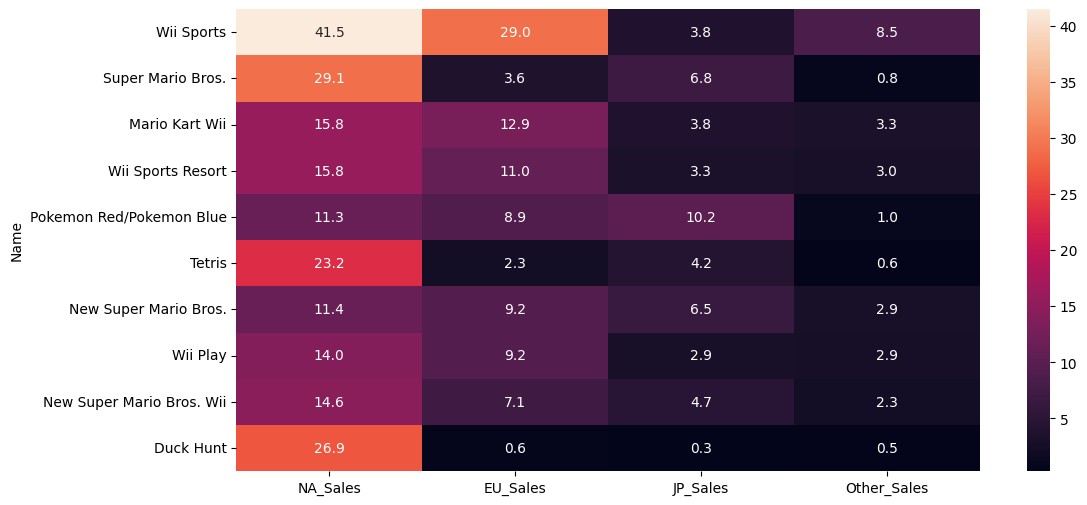

In [64]:
sns.heatmap(top10_game, annot=True, fmt = '.1f')

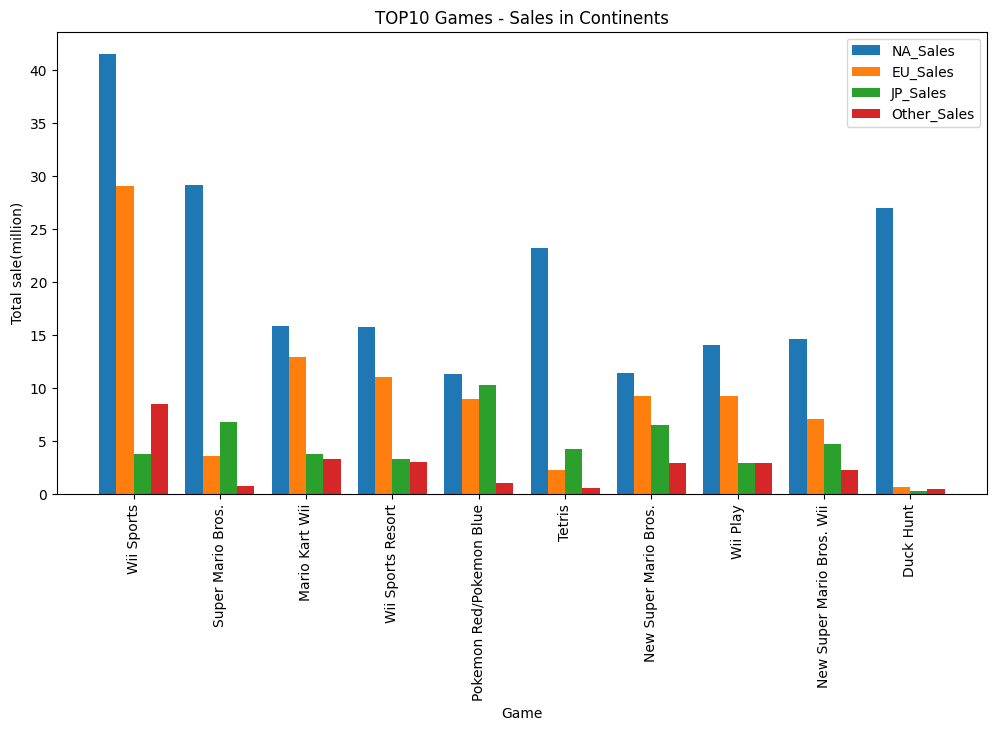

In [65]:
# we use same dataframe  as heatmap , indeed we convert heatmap to bar
X_axis = np.arange(len(top10_game))

y1=top10_game["NA_Sales"]
y2=top10_game["EU_Sales"]
y3=top10_game["JP_Sales"]
y4=top10_game["Other_Sales"]
  
plt.bar(X_axis-0.3,y1,0.2,label="NA_Sales")
plt.bar(X_axis-0.1,y2,0.2,label="EU_Sales")
plt.bar(X_axis+0.1,y3,0.2,label="JP_Sales")
plt.bar(X_axis+0.3,y4,0.2,label="Other_Sales")

plt.xticks(X_axis, top10_game.index,rotation=90) # IMPORTANTE

plt.title("TOP10 Games - Sales in Continents")
plt.xlabel("Game")
plt.ylabel("Total sale(million)")


plt.legend()

<font size="5">Release Years - Global Sales Scatter TOP100 game</font>

In [66]:
top100=df[["Rank","Global_Sales","Year"]][:100]
top100.head(5)

Rank  Global_Sales    Year
0     1         82.74  2006.0
1     2         40.24  1985.0
2     3         35.82  2008.0
3     4         33.00  2009.0
4     5         31.37  1996.0

Text(0.5, 1.0, 'Rank - Release Years - Global Sales(circle size)')

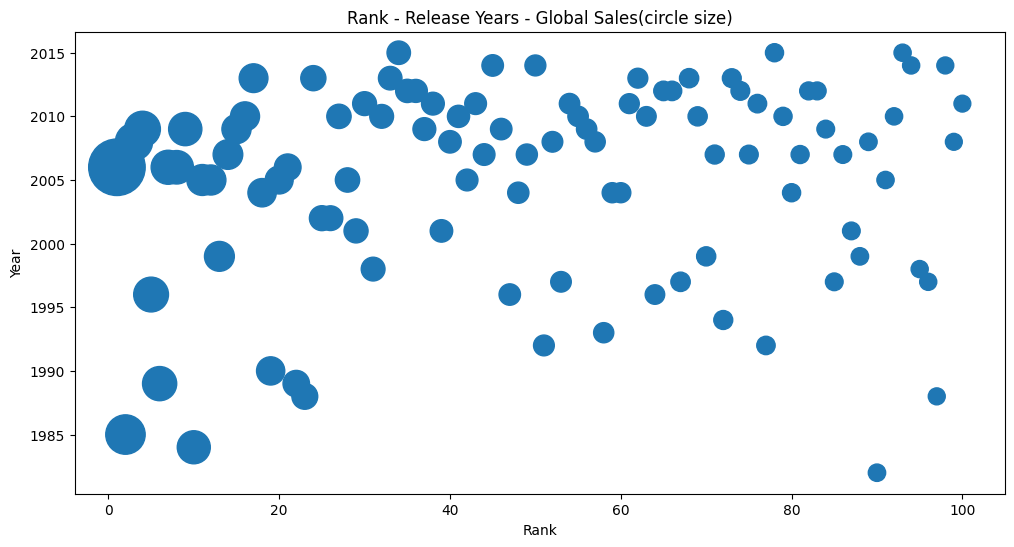

In [67]:
x=top100["Rank"]
y=top100["Year"]
plt.scatter(x,y,s=top100["Global_Sales"]*20)
plt.xlabel("Rank")
plt.ylabel("Year")
plt.title("Rank - Release Years - Global Sales(circle size)")

# Animated Bars

 <font size="5">TOP5 Publisher by Global Sales Yearly</font>

In [68]:
publisher_top5=df.groupby(["Publisher"])["Global_Sales"].sum().sort_values(ascending=False)[:5].index.tolist()
publisher_top5

['Nintendo',
 'Electronic Arts',
 'Activision',
 'Sony Computer Entertainment',
 'Ubisoft']

In [69]:
m=0
index_list_top5_publisher=[]
for publ in df["Publisher"]:
    if publ in publisher_top5:
        index_list_top5_publisher.append(m)
    m+=1
index_list_top5_publisher[:3]

[0, 1, 2]

In [70]:
publisher_top5_sales=df.iloc[index_list_top5_publisher]
publisher_top5_sales=publisher_top5_sales.groupby(["Publisher","Year"])["Global_Sales"].sum().reset_index()
publisher_top5_sales=publisher_top5_sales.sort_values("Year",ascending=True)
publisher_top5_sales.head(3)

Publisher    Year  Global_Sales
0  Activision  1980.0          3.02
1  Activision  1981.0          8.50
2  Activision  1982.0          1.86

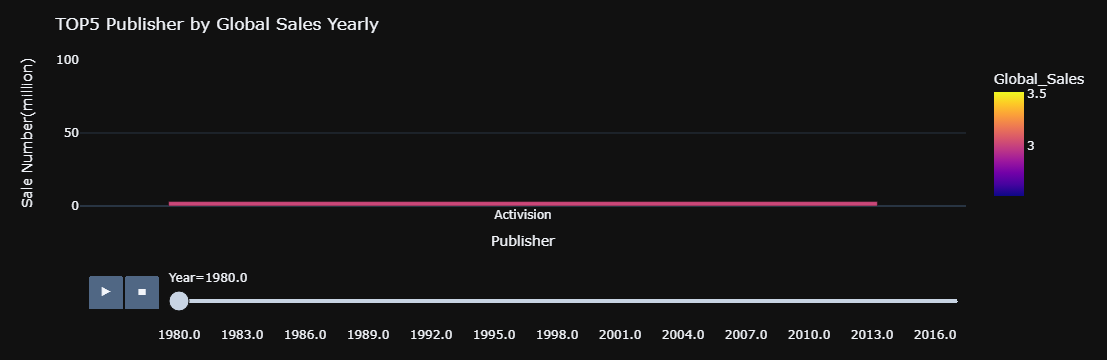

In [71]:
fig = px.bar(publisher_top5_sales, x="Publisher", y="Global_Sales", color="Global_Sales",
  animation_frame="Year", animation_group="Publisher", range_y=[0,100])

fig.update_xaxes(type="category")

fig.update_layout(
    template="plotly_dark",
    title_text='TOP5 Publisher by Global Sales Yearly ',  # Set the title of the plot
    yaxis_title="Sale Number(million)",  # Label for the y-ax
    width=1000
                )

fig.show()

<font size="5">Genre Global Sales Yearly </font>

In [72]:
genre_yearly=pd.DataFrame(df.groupby(["Genre","Year"])["Global_Sales"].sum())


genre_yearly=genre_yearly.reset_index()
genre_yearly

Genre    Year  Global_Sales
0      Action  1980.0          0.34
1      Action  1981.0         14.84
2      Action  1982.0          6.52
3      Action  1983.0          2.86
4      Action  1984.0          1.85
..        ...     ...           ...
384  Strategy  2012.0          3.33
385  Strategy  2013.0          6.33
386  Strategy  2014.0          0.99
387  Strategy  2015.0          1.82
388  Strategy  2016.0          0.50

[389 rows x 3 columns]

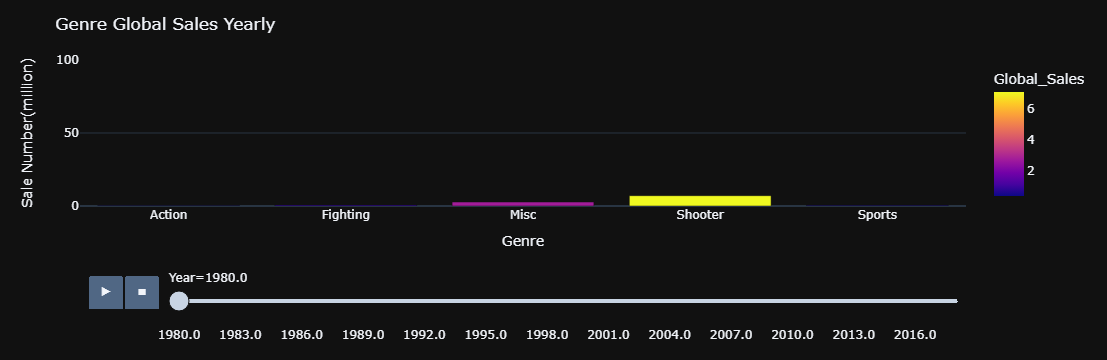

In [73]:
fig = px.bar(genre_yearly, x="Genre", y="Global_Sales", color="Global_Sales",
  animation_frame="Year", animation_group="Genre", range_y=[0,100])

fig.update_layout(
    template="plotly_dark",
    title_text='Genre Global Sales Yearly ',  # Set the title of the plot
    yaxis_title="Sale Number(million)",  # Label for the y-ax
    width=1000
                )

fig.show()